In [1]:
import pandas as pd
import json
from pandas import json_normalize
from SPARQLWrapper import SPARQLWrapper, JSON
from rdflib import Graph
from rdflib.namespace import FOAF, RDF

## MODELO DE LOS DATOS
La ontología-conferencia es una nueva ontología autónoma para modelar el conocimiento sobre las conferencias. La ontología de conferencia adopta las mejores prácticas de diseño de ontologías (p. ej., patrones de diseño de ontologías, reutilización e interconexión de ontologías) y garantiza la interoperabilidad con la ontología SWC y todos los demás vocabularios pertinentes.

![title](capturas/conference-ontology-model.png)

## DIMENSIONAMIENTO DE LOS DATOS RDF

### Obtención de la dimensión o cantidad de clases que existen

In [6]:
endPoint = "http://MSI:7200/repositories/ProyectoDatos"
sparql = SPARQLWrapper(endPoint)

def getClassesDimention():
    query = """
    PREFIX person: <https://w3id.org/scholarlydata/person/>
    PREFIX conf: <https://w3id.org/scholarlydata/ontology/conference-ontology.owl#>
    SELECT DISTINCT ?class (count(?class) as ?count)
    WHERE{
     [ ] a ?class.
    
        FILTER(regex(str(?class), 'https://w3id.org/scholarlydata/ontology/conference-ontology.owl#', 'i')) 

    }GROUP BY ?class
    """
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    return sparql.query().convert()

results = getClassesDimention()
df = json_normalize(results["results"]["bindings"]) #Res
df


,class.type,class.value,count.datatype,count.type,count.value
0,uri,https://w3id.org/scholarlydata/ontology/confer...,http://www.w3.org/2001/XMLSchema#integer,literal,5884
1,uri,https://w3id.org/scholarlydata/ontology/confer...,http://www.w3.org/2001/XMLSchema#integer,literal,19592
2,uri,https://w3id.org/scholarlydata/ontology/confer...,http://www.w3.org/2001/XMLSchema#integer,literal,11744
3,uri,https://w3id.org/scholarlydata/ontology/confer...,http://www.w3.org/2001/XMLSchema#integer,literal,3358
4,uri,https://w3id.org/scholarlydata/ontology/confer...,http://www.w3.org/2001/XMLSchema#integer,literal,20903
5,uri,https://w3id.org/scholarlydata/ontology/confer...,http://www.w3.org/2001/XMLSchema#integer,literal,4030
6,uri,https://w3id.org/scholarlydata/ontology/confer...,http://www.w3.org/2001/XMLSchema#integer,literal,5757
7,uri,https://w3id.org/scholarlydata/ontology/confer...,http://www.w3.org/2001/XMLSchema#integer,literal,10311
8,uri,https://w3id.org/scholarlydata/ontology/confer...,http://www.w3.org/2001/XMLSchema#integer,literal,7
9,uri,https://w3id.org/scholarlydata/ontology/confer...,http://www.w3.org/2001/XMLSchema#integer,literal,5


In [7]:
df['class'] = df['class.value'].str.lstrip('https://w3id.org/scholarlydata/ontology/conference-ontology.owl#')

<class 'numpy.int32'>


c:\users\roberto narvaez\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


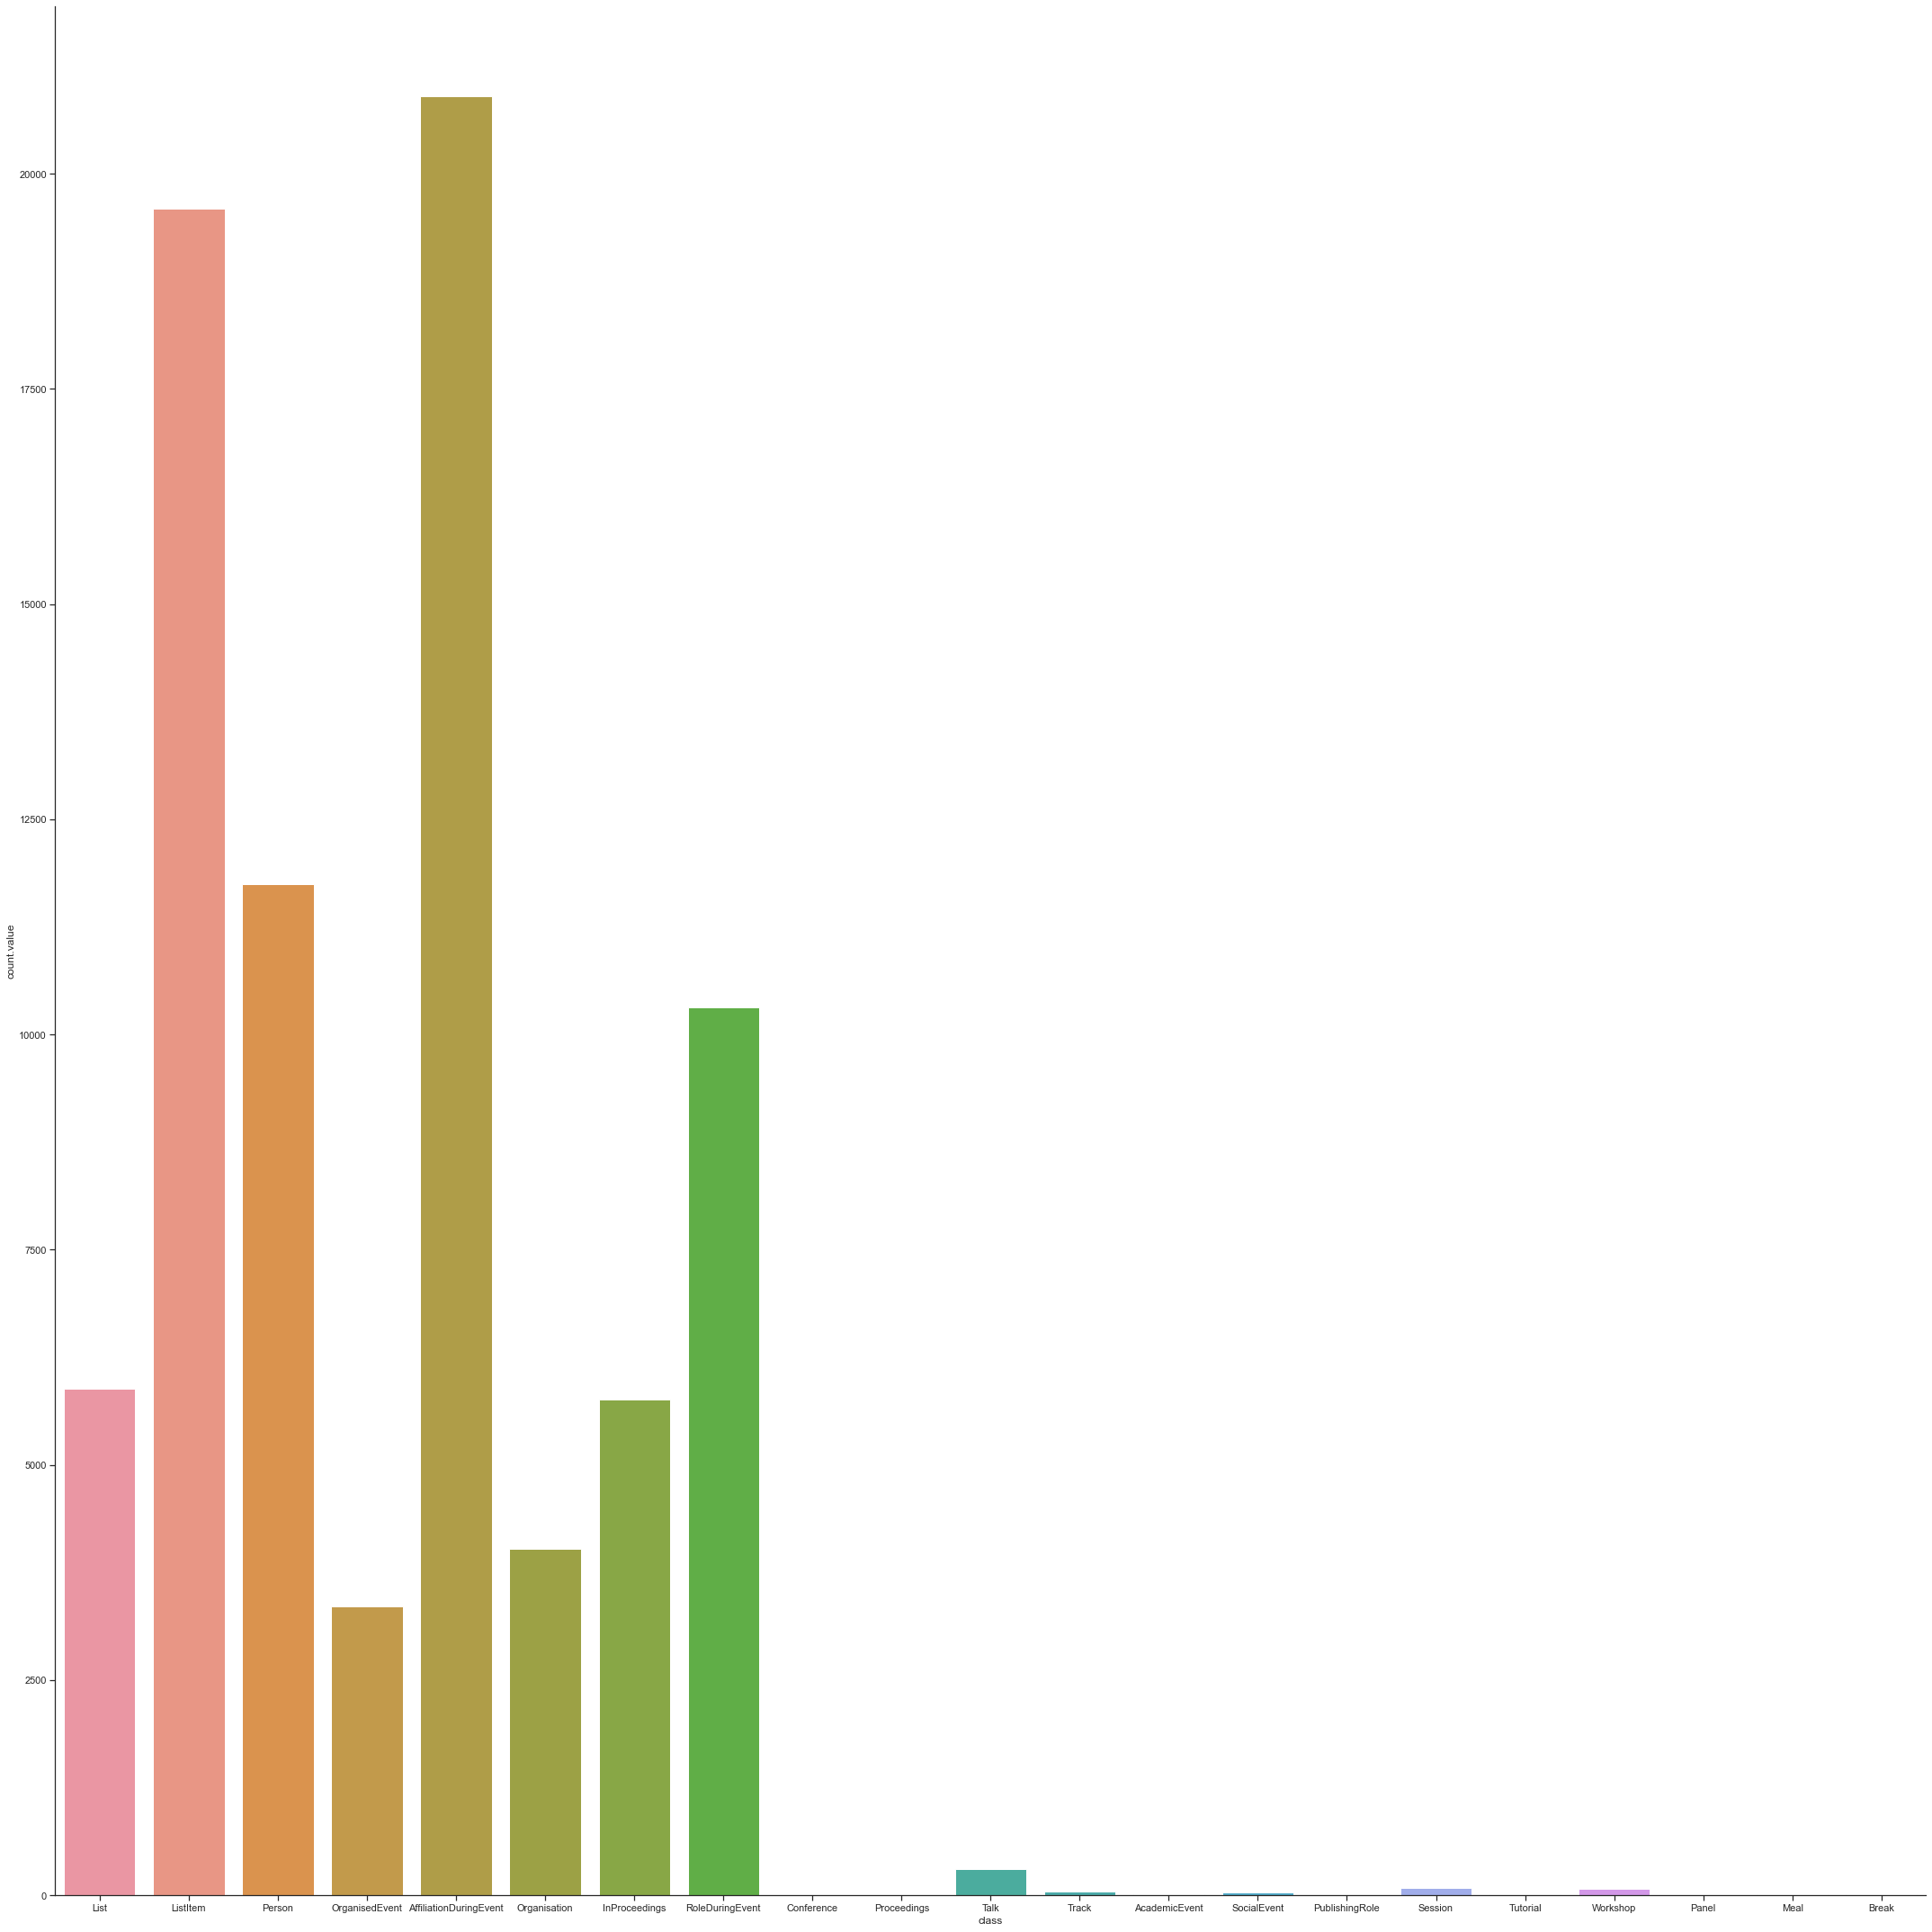

In [10]:
df['count.value'] = df['count.value'].astype(int)
print(type(df["count.value"][0]))

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="class", y="count.value", kind="bar", data=df, size=30)

In [9]:
print(df['class'])

0                       List
1                   ListItem
2                     Person
3             OrganisedEvent
4     AffiliationDuringEvent
5               Organisation
6              InProceedings
7            RoleDuringEvent
8                 Conference
9                Proceedings
10                      Talk
11                     Track
12             AcademicEvent
13               SocialEvent
14            PublishingRole
15                   Session
16                  Tutorial
17                  Workshop
18                     Panel
19                      Meal
20                     Break
Name: class, dtype: object


### Cantidad de propiedades que existen en la Ontologia

In [65]:
endPoint = "http://DESKTOP-3KNOEN3:7200/repositories/PROYECTO"
sparql = SPARQLWrapper(endPoint)

def getPropertiesDimention():
    query = """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX person: <https://w3id.org/scholarlydata/person/>
    PREFIX conf: <https://w3id.org/scholarlydata/ontology/conference-ontology.owl#>

    SELECT DISTINCT ?prop
    WHERE {
        ?prop a rdf:Property
    }
    """
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    return sparql.query().convert()

results = getPropertiesDimention()
df2 = json_normalize(results["results"]["bindings"]) #Res
df2['prop'] = df2['prop.value'].str.lstrip("#")
print(df2['prop'])

0       http://www.w3.org/1999/02/22-rdf-syntax-ns#type
1     http://www.w3.org/2000/01/rdf-schema#subProper...
2       http://www.w3.org/2000/01/rdf-schema#subClassOf
3           http://www.w3.org/2000/01/rdf-schema#domain
4            http://www.w3.org/2000/01/rdf-schema#range
                            ...                        
62    https://w3id.org/scholarlydata/ontology/confer...
63    https://w3id.org/scholarlydata/ontology/confer...
64                       http://xmlns.com/foaf/0.1/made
65    https://w3id.org/scholarlydata/ontology/confer...
66                  http://xmlns.com/foaf/0.1/givenName
Name: prop, Length: 67, dtype: object


In [66]:
endPoint = "http://DESKTOP-3KNOEN3:7200/repositories/PROYECTO"
sparql = SPARQLWrapper(endPoint)

def getPapers():
    query = """
    PREFIX person: <https://w3id.org/scholarlydata/person/>
    PREFIX conf: <https://w3id.org/scholarlydata/ontology/conference-ontology.owl#>
    SELECT DISTINCT ?paper ?title ?person ?name
    WHERE{
      ?paper a conf:InProceedings;
        conf:hasAuthorList ?authorList;
        conf:title ?title . 
      ?authorList conf:hasFirstItem ?item .
      ?item conf:hasContent ?person .
      ?person conf:name ?name
    }
    """
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    return sparql.query().convert()

results = getPapers()
df3 = json_normalize(results["results"]["bindings"]) #Res
df3

,paper.type,paper.value,title.type,title.value,person.type,person.value,name.type,name.value
0,uri,https://w3id.org/scholarlydata/inproceedings/c...,literal,Identifying Information Needs by Modelling Col...,uri,https://w3id.org/scholarlydata/person/khadija-...,literal,Khadija Elbedweihy
1,uri,https://w3id.org/scholarlydata/inproceedings/c...,literal,Incremental SPARQL Evaluation for Query Answer...,uri,https://w3id.org/scholarlydata/person/florian-...,literal,Florian Schmedding
2,uri,https://w3id.org/scholarlydata/inproceedings/c...,literal,LODWheel – JavaScript-based Visualization of R...,uri,https://w3id.org/scholarlydata/person/magnus-s...,literal,Magnus Stuhr
3,uri,https://w3id.org/scholarlydata/inproceedings/c...,literal,The Information Workbench as a Self-Service Pl...,uri,https://w3id.org/scholarlydata/person/peter-haase,literal,Peter Haase
4,uri,https://w3id.org/scholarlydata/inproceedings/c...,literal,Towards Green Linked Data,uri,https://w3id.org/scholarlydata/person/julia-hoxha,literal,Julia Hoxha
...,...,...,...,...,...,...,...,...
6170,uri,https://w3id.org/scholarlydata/inproceedings/x...,literal,Extraction of Onomatopoeia Used for Foods from...,uri,https://w3id.org/scholarlydata/person/ayumi-kato,literal,Ayumi Kato
6171,uri,https://w3id.org/scholarlydata/inproceedings/x...,literal,Solution Mining for specific contextualised pr...,uri,https://w3id.org/scholarlydata/person/christia...,literal,Christian Severin Sauer
6172,uri,https://w3id.org/scholarlydata/inproceedings/x...,literal,Extraction of procedural knowledge from the We...,uri,https://w3id.org/scholarlydata/person/pol-schu...,literal,Pol Schumacher
6173,uri,https://w3id.org/scholarlydata/inproceedings/x...,literal,"Collecting, reusing and executing private work...",uri,https://w3id.org/scholarlydata/person/sebastia...,literal,Sebastian Görg


In [69]:
df3['name'] = df3['name.value'] 

In [75]:
p = df3.groupby('title.value').name.nunique().reset_index()
print(p.sort_values(by=['name'], ascending=False))

                                            title.value  name
4491  Summary Models for Routing Keywords to Linked ...     7
2354  IBSE: An OWL Interoperability Evaluation Infra...     6
4731     The Object with States Ontology Design Pattern     6
2236  Guidelines for Benchmarking the Performance of...     6
3384  Ontology-based Interpretation of Keywords for ...     5
...                                                 ...   ...
1909  Exploring Semantic Features for Producing Top-...     1
1908             Exploring Scholarly Data with Rexplore     1
1907                Exploring RDF/S KBs Using Summaries     1
1906         Exploring Linked Open Data with Tag Clouds     1
5495  ♠ Demo: An Open Source Tool for Partial Parsin...     1

[5496 rows x 2 columns]


## Papers relacionados con SPARQL o RDF

In [18]:
endPoint = "http://MSI:7200/repositories/ProyectoDatos"
sparql = SPARQLWrapper(endPoint)

def getPapers():
    query = """
    PREFIX person: <https://w3id.org/scholarlydata/person/>
    PREFIX conf: <https://w3id.org/scholarlydata/ontology/conference-ontology.owl#>
    SELECT DISTINCT ?paper ?title 
    WHERE{
       VALUES ?tipoPaper{'SPARQL' 'RDF'}
      ?paper a conf:InProceedings;
        conf:hasAuthorList ?authorList;
        conf:title ?title . 
       filter contains(UCASE(?title), ?tipoPaper) 
    }
    """
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    return sparql.query().convert()

results = getPapers()
df4 = json_normalize(results["results"]["bindings"]) #Res
df4 = df4['title.value']

In [19]:
df4

0      Incremental SPARQL Evaluation for Query Answer...
1      SPLENDID: SPARQL Endpoint Federation Exploitin...
2      Freshening Up While Staying Fast: Towards Hybr...
3      Vocabulary Services Based on SPARQL Endpoints:...
4      Flexible RDF generation from RDF and heterogen...
                             ...                        
498    Getting More RDF Support from Relational Datab...
499    Binary RDF for Scalable Publishing, Exchanging...
500    A JavaScript RDF store and application library...
501                         A rendering language for RDF
502          Continuous Integration for XML and RDF Data
Name: title.value, Length: 503, dtype: object